In [3]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split 
import seaborn as sns
%matplotlib inline
from random import randint, choice, choices

In [4]:
df = pd.read_csv("../HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
df.drop(["Department", "salary"], axis=1).groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<b>1. High Satisfactied Employees kept working</b> <br>
<b>2. If employee leaves if he/she works more in a month</b><br>
<b>3. If employee gets promotion, continues working </b>

In [6]:
left_low = df["left"][(df["left"] == 1) & (df["salary"] == "low")].count()
left_medium = df["left"][(df["left"] == 1) & (df["salary"] == "medium")].count()
left_high = df["left"][(df["left"] == 1) & (df["salary"] == "high")].count()
working_low = df["left"][(df["left"] == 0) & (df["salary"] == "low")].count()
working_medium = df["left"][(df["left"] == 0) & (df["salary"] == "medium")].count()
working_high = df["left"][(df["left"] == 0) & (df["salary"] == "high")].count()
left_emp = [left_low, left_medium, left_high]
working_emp = [working_low, working_medium, working_high]
salary_list = ["Low Salary", "Medium Salary", "High Salary"]

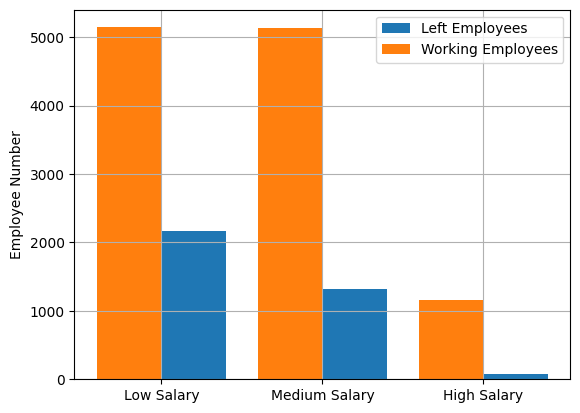

In [7]:
X_axis = np.arange(len(salary_list))
plt.bar(X_axis + 0.2, left_emp, 0.4, label="Left Employees")
plt.bar(X_axis - 0.2 , working_emp, 0.4, label="Working Employees")
plt.ylabel("Employee Number")
plt.xticks(X_axis, salary_list)
plt.legend()
plt.grid()
plt.show()

In [8]:
department = df.groupby(by=["Department", "left"]).size().unstack()
department

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


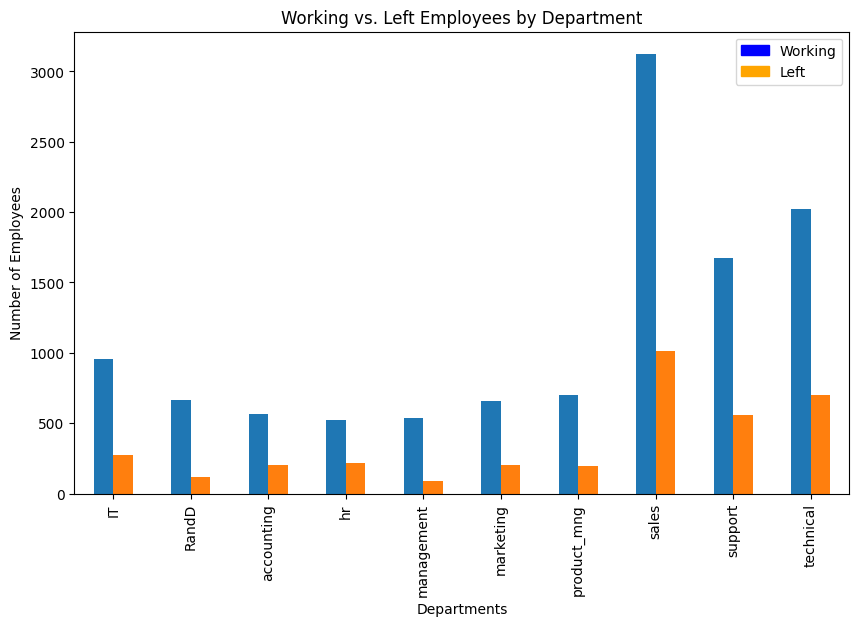

In [9]:
ax = department.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Departments')
ax.set_ylabel('Number of Employees')
ax.set_title('Working vs. Left Employees by Department')
active_patch = mpatches.Patch(color='blue', label='Working')
passive_patch = mpatches.Patch(color='orange', label='Left')
ax.legend(handles=[active_patch, passive_patch])
plt.show()

In [10]:
new_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years']]
test_df = pd.concat([pd.get_dummies(df["salary"], dtype=int), new_df], axis=1)

test_df

,high,low,medium,satisfaction_level,average_montly_hours,promotion_last_5years
0,0,1,0,0.38,157,0
1,0,0,1,0.80,262,0
2,0,0,1,0.11,272,0
3,0,1,0,0.72,223,0
4,0,1,0,0.37,159,0
...,...,...,...,...,...,...
14994,0,1,0,0.40,151,0
14995,0,1,0,0.37,160,0
14996,0,1,0,0.37,143,0
14997,0,1,0,0.11,280,0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(test_df, df["left"],test_size=0.2) 

In [12]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [13]:
model.score(x_test, y_test)

0.7733333333333333